# Question 3: Eigenfaces

In [1]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

## Download data

In [2]:
face_data = scipy.io.loadmat('face_data.mat')

In [3]:
image = face_data["image"][0] #640x1 -> each image is 50x50
personID = face_data["personID"] #1x640
subsetID = face_data["subsetID"] #1x640

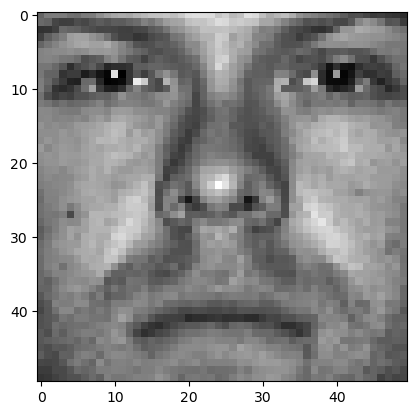

In [4]:
plt.imshow(image[0], cmap='gray')

### Making the X matrix -> nxd

In [5]:
X = []
for img in image:
    X.append(img.flatten())
X=np.array(X)

## PCA

### 1. Zero-center all features

In [6]:
n = X.shape[0]
d = X.shape[1]

mean_of_columns = np.mean(X, axis=0)
X_zero_centered = X - mean_of_columns

### 2. Get covariance matrix

In [8]:
Cx = (1/(n-1)) * X_zero_centered.T @ X_zero_centered 
# n-1 match the np.cov more than n but slides say n

### 3. Finding P

In [9]:
#Cx = Q*EIGN*Q^T
eval, evect = np.linalg.eig(Cx)

### 4. Sort the evalues in descending order

In [10]:
inds = np.argsort(eval) #returns the indices that would sort an array.
inds = inds[::-1]

In [11]:
eval_sorted = eval[inds]
evect_sorted = evect[:,inds]

### 5. Select the top d features

In [32]:
k = 250
top_d_evectors = evect_sorted[:, :k]
top_d_evectors = np.real(top_d_evectors)

In [33]:
print(top_d_evectors.shape) #

(2500, 250)


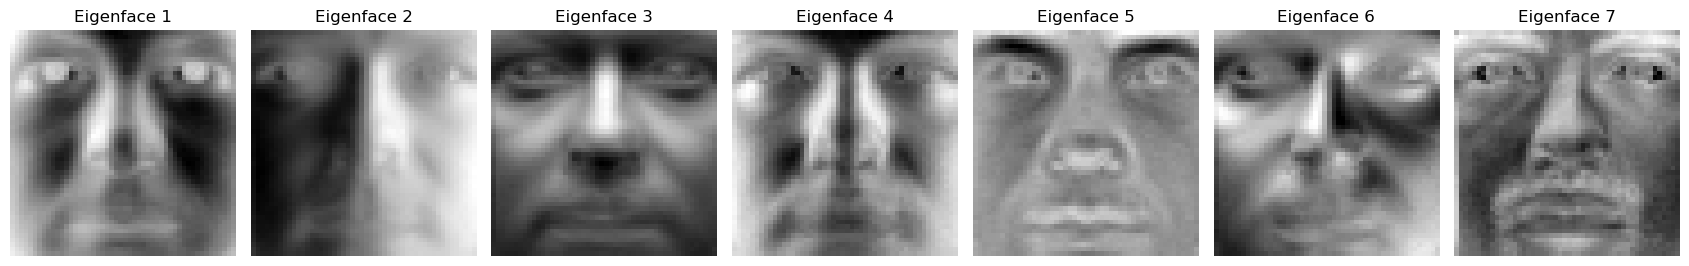

In [34]:
# Display Eigenfaces
fig, axes = plt.subplots(1, 7, figsize=(17, 15))
for i in range(7):
    eigenface1 = top_d_evectors[:, i].reshape(50, 50)
    axes[i].imshow(eigenface1, cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f'Eigenface {i+1}')
plt.tight_layout()
plt.show()

### 6. Transform the original n dimensional data points into k dimensions.

In [18]:
projection = np.dot(X_zero_centered,top_d_evectors)

In [19]:
print(projection.shape)

(640, 250)


In [20]:
reconstructed = np.dot(projection, top_d_evectors.T)

In [21]:
print(reconstructed.shape)

(640, 2500)


In [22]:
first_img = reconstructed[0].reshape(50, 50)


## Calling PCA_FUN

In [6]:
def pca_fun(input_data, target_d):
    X = input_data
    
    # Zero-center all the features
    n = X.shape[0]
    d = X.shape[1]

    mean_of_columns = np.mean(X, axis=0)
    X_zero_centered = X - mean_of_columns
    
    # Get the covariance matrix
    Cx = (1/(n)) * X_zero_centered.T @ X_zero_centered 
    
    # eigenvalues and eigenvectors
    eval, evect = np.linalg.eig(Cx)
    
    inds = np.argsort(eval) #returns the indices that would sort an array.
    inds = inds[::-1]
    eval_sorted = eval[inds]
    evect_sorted = evect[:,inds]
    
    # print(" ")
    # print(evect_sorted)
    
    # select top d features
    
    top_d_evectors = evect_sorted[:, :target_d]
    # print(top_d_evectors)
    P = np.real(top_d_evectors)
    
    # P: d x target_d matrix containing target_d eigenvectors
    return P

In [7]:
P = pca_fun(X, 250)

In [9]:
P.shape

(2500, 250)

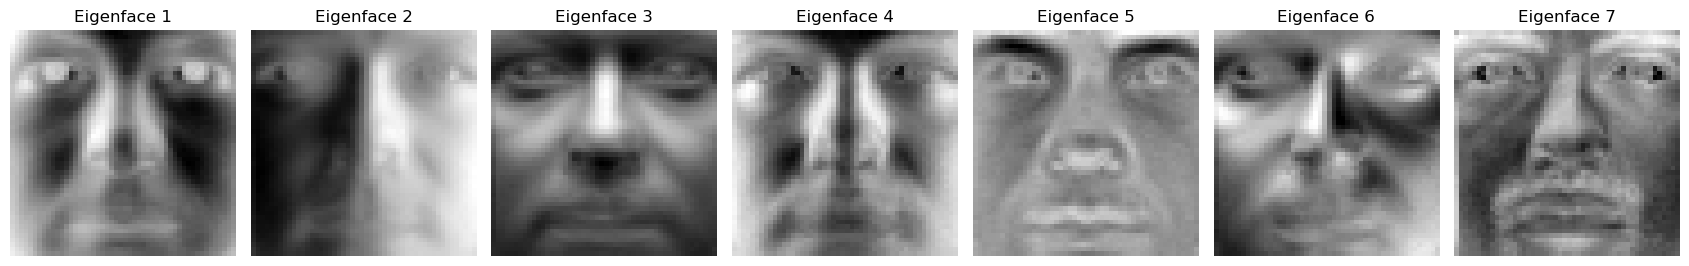

In [8]:
# Display Eigenfaces
fig, axes = plt.subplots(1, 7, figsize=(17, 15))
for i in range(7):
    eigenface1 = P[:, i].reshape(50, 50)
    axes[i].imshow(eigenface1, cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f'Eigenface {i+1}')
plt.tight_layout()
plt.show()